In [118]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')

from pandas.io.json import json_normalize #package for flattening json in pandas df

In [110]:
URL = 'https://api.nytimes.com/svc/mostpopular/v2/viewed/30.json?api-key='

name = "MfbAm3jsAPQ0UZ3kAxRGZ8SdbxcDVWQD" # API Key

x = requests.get('https://api.nytimes.com/svc/mostpopular/v2/viewed/30.json?api-key=MfbAm3jsAPQ0UZ3kAxRGZ8SdbxcDVWQD')
print(x.status_code)

200


In [111]:

# checking for successful connection
if x.status_code== 200:
    print('Success!')
elif x.status_code== 404:
    print('Not Found.')

Success!


In [113]:


j = x.json()
#msgs = pd.io.json.json_normalize(j)


json_normalize(j)
df = pd.DataFrame.from_dict(j)
df = pd.DataFrame.from_dict(j, orient='columns')
print (json_normalize(j))
df.head(1)

                                           copyright  num_results  \
0  Copyright (c) 2019 The New York Times Company....         1881   

                                             results status  
0  [{'url': 'https://www.nytimes.com/2019/10/13/u...     OK  


,status,copyright,num_results,results
0,OK,Copyright (c) 2019 The New York Times Company....,1881,{'url': 'https://www.nytimes.com/2019/10/13/us...


In [114]:

nycphil = json_normalize(j['results'])
nycphil.head(2)

,abstract,adx_keywords,asset_id,byline,column,des_facet,geo_facet,id,media,org_facet,per_facet,published_date,section,source,title,type,uri,url,views
0,The video was shown at a conference attended b...,"Trump, Donald J;United States Politics and Gov...",100000006766586,By MICHAEL S. SCHMIDT and MAGGIE HABERMAN,NaN,"[UNITED STATES POLITICS AND GOVERNMENT, PRESID...",,100000006766586,"[{'type': 'image', 'subtype': 'photo', 'captio...","[VIDEO RECORDINGS, DOWNLOADS AND STREAMING, VI...","[TRUMP, DONALD J, TRUMP, DONALD J JR]",2019-10-13,U.S.,The New York Times,Macabre Video of Fake Trump Shooting Media and...,Article,nyt://article/a1f124ab-6902-5b2c-a91f-e1c6dcd4...,https://www.nytimes.com/2019/10/13/us/politics...,1
1,We’ve plucked out the 50 best films currently ...,"Netflix Inc;Movies;Video Recordings, Downloads...",100000006330108,By JASON BAILEY,,"[MOVIES, VIDEO RECORDINGS, DOWNLOADS AND STREA...",,100000006330108,"[{'type': 'image', 'subtype': 'photo', 'captio...",[NETFLIX INC],,2019-03-06,Arts,The New York Times,The 50 Best Movies on Netflix Right Now,Interactive,nyt://interactive/3769fe44-d294-5a71-8281-5220...,https://www.nytimes.com/interactive/2019/arts/...,2


In [115]:
nycphil.shape


(20, 19)

In [116]:

pd.pivot_table(nycphil,index=["section"])
tmp = nycphil.groupby(by=['section','source'])['section'].count()
tmp2 = pd.DataFrame({'section_count': tmp}).reset_index()
tmp2

,section,source,section_count
0,Arts,The New York Times,1
1,Health,The New York Times,1
2,Movies,The New York Times,1
3,New York,The New York Times,1
4,Opinion,The New York Times,3
5,U.S.,The New York Times,12
6,World,The New York Times,1


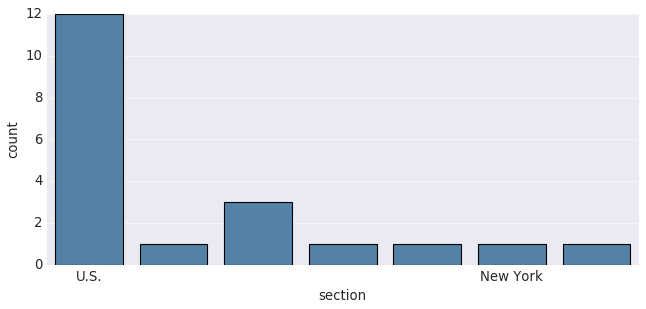

In [126]:
# Plot lastest "hot" articles of NY Times for last 30 days 

with sns.axes_style('darkgrid'):
    g = sns.factorplot("section", data=nycphil, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

In [ ]:
# The US sections has the most article